In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [33]:
df = pd.read_csv('CarPrice_Assignment2.csv')
df.head()


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [29]:
df.isnull().sum()

car_ID               0
symboling            0
CarName              0
fueltype             0
aspiration           0
doornumber           0
carbody              0
drivewheel           0
enginelocation       0
wheelbase            0
carlength            0
carwidth             0
carheight            0
curbweight           0
enginetype           0
cylindernumber       0
enginesize           0
fuelsystem           0
boreratio            0
stroke               0
compressionratio     0
horsepower           0
peakrpm              0
citympg              0
highwaympg           0
price               11
dtype: int64

In [30]:
moda = df['price'].value_counts().index[0]
moda 

13499.0

In [5]:
df['price'].fillna(value= moda, inplace = True)
df.describe()

C:\Users\jenny\AppData\Local\Temp\ipykernel_8912\3708965386.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['price'].fillna(value= moda, inplace = True)


,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13289.705693
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7875.876552
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7895.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10898.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,15998.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [6]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

<Axes: xlabel='horsepower', ylabel='Count'>

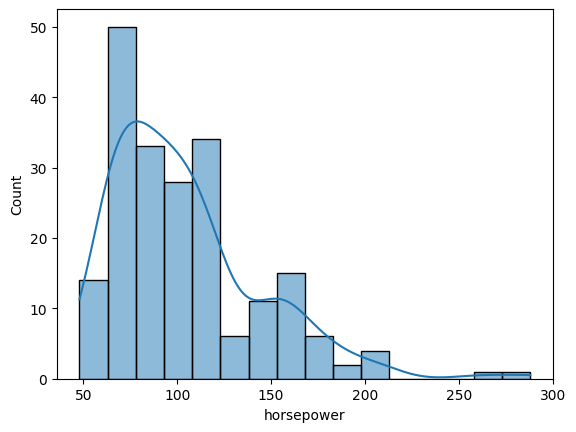

In [7]:
sns.histplot(data = df, x = "horsepower", kde = True)


In [8]:
#CRIANDO UM ARRAY DE ARRAY
X = np.array(df['horsepower'])
X = X.reshape(-1, 1)
X

array([[111],
       [111],
       [154],
       [102],
       [115],
       [110],
       [110],
       [110],
       [140],
       [160],
       [101],
       [101],
       [121],
       [121],
       [121],
       [182],
       [182],
       [182],
       [ 48],
       [ 70],
       [ 70],
       [ 68],
       [ 68],
       [102],
       [ 68],
       [ 68],
       [ 68],
       [102],
       [ 88],
       [145],
       [ 58],
       [ 76],
       [ 60],
       [ 76],
       [ 76],
       [ 76],
       [ 76],
       [ 86],
       [ 86],
       [ 86],
       [ 86],
       [101],
       [100],
       [ 78],
       [ 70],
       [ 70],
       [ 90],
       [176],
       [176],
       [262],
       [ 68],
       [ 68],
       [ 68],
       [ 68],
       [ 68],
       [101],
       [101],
       [101],
       [135],
       [ 84],
       [ 84],
       [ 84],
       [ 84],
       [ 64],
       [ 84],
       [120],
       [ 72],
       [123],
       [123],
       [123],
       [123],
      

In [9]:
y = df['price']
y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    13499.0
204    13499.0
Name: price, Length: 205, dtype: float64

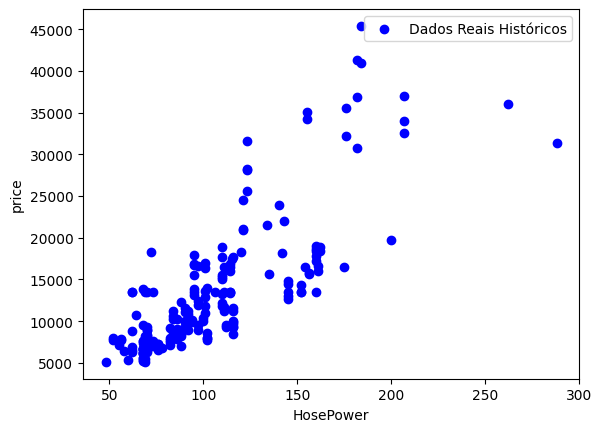

In [10]:
plt. scatter(X,y, color='blue', label="Dados Reais Históricos")
plt.xlabel("HosePower")
plt.ylabel("price")
plt.legend()
plt.show()

In [11]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.5, random_state= 42)


In [34]:
X_treino.shape


(102, 1)

In [13]:
modelo = LinearRegression()

In [14]:
modelo.fit(X_treino, y_treino)

LinearRegression()

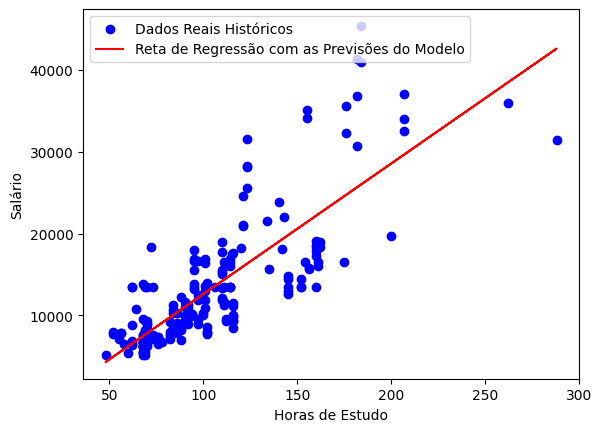

In [15]:
plt.scatter(X, y, color= "blue", label="Dados Reais Históricos")
plt.plot(X, modelo.predict(X), color = "red", label="Reta de Regressão com as Previsões do Modelo")
plt.xlabel("Horas de Estudo")
plt.ylabel("Salário")
plt.legend()
plt.show()

In [16]:
score = modelo.score(X_teste, y_teste)
print(f'Coeficiente R^2: {score:.2f}')

Coeficiente R^2: 0.62


In [17]:
horsepower = np.array([[111]])

price = modelo.predict(horsepower)

print(f"Se você procurar um pontencia de {horsepower} o preço é {price}")

Se você procurar um pontencia de [[111]] o preço é [14363.12435933]
